In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats

In [3]:
# bccard 데이터 만들기
bccard=pd.read_csv("비씨카드.csv",encoding='CP949')

In [4]:
bccard.head(20)

,매출년월,지역(구),지역(동),성별,연령대,업종코드,업종명,신용/체크 구분,건수,금액
0,201901,종로구,가회동,남,30대,8021,스넥,신용,102,1802700
1,201901,종로구,가회동,남,40대,8006,서양음식,신용,682,8618430
2,201901,종로구,가회동,남,40대,8021,스넥,신용,96,1478200
3,201901,종로구,가회동,여,20대,4010,편 의 점,체크,959,3940140
4,201901,종로구,가회동,여,20대,8006,서양음식,신용,395,5641840
5,201901,종로구,가회동,여,20대,8021,스넥,체크,165,2117150
6,201901,종로구,가회동,여,30대,4010,편 의 점,체크,762,3869280
7,201901,종로구,가회동,여,30대,8001,일반한식,신용,588,13963715
8,201901,종로구,가회동,여,40대,4010,편 의 점,신용,484,2544130
9,201901,종로구,가회동,여,40대,8006,서양음식,신용,649,9223640


In [5]:
# bccard 데이터 컬럼 순서 바꾸기
bccard.loc[:, ["지역(구)", "지역(동)", "매출년월", "성별", "연령대", "업종코드", "업종명", "신용/체크 구분", "건수", "금액"]].head(20)

,지역(구),지역(동),매출년월,성별,연령대,업종코드,업종명,신용/체크 구분,건수,금액
0,종로구,가회동,201901,남,30대,8021,스넥,신용,102,1802700
1,종로구,가회동,201901,남,40대,8006,서양음식,신용,682,8618430
2,종로구,가회동,201901,남,40대,8021,스넥,신용,96,1478200
3,종로구,가회동,201901,여,20대,4010,편 의 점,체크,959,3940140
4,종로구,가회동,201901,여,20대,8006,서양음식,신용,395,5641840
5,종로구,가회동,201901,여,20대,8021,스넥,체크,165,2117150
6,종로구,가회동,201901,여,30대,4010,편 의 점,체크,762,3869280
7,종로구,가회동,201901,여,30대,8001,일반한식,신용,588,13963715
8,종로구,가회동,201901,여,40대,4010,편 의 점,신용,484,2544130
9,종로구,가회동,201901,여,40대,8006,서양음식,신용,649,9223640


In [6]:
bccard_1 = bccard.loc[:, ["지역(구)", "지역(동)", "매출년월", "금액"]]
bccard_2 = bccard.loc[:, ["지역(구)", "지역(동)", "업종명", "금액"]]

In [7]:
bccard_1.head(10)

,지역(구),지역(동),매출년월,금액
0,종로구,가회동,201901,1802700
1,종로구,가회동,201901,8618430
2,종로구,가회동,201901,1478200
3,종로구,가회동,201901,3940140
4,종로구,가회동,201901,5641840
5,종로구,가회동,201901,2117150
6,종로구,가회동,201901,3869280
7,종로구,가회동,201901,13963715
8,종로구,가회동,201901,2544130
9,종로구,가회동,201901,9223640


In [8]:
bccard_2.head(10)

,지역(구),지역(동),업종명,금액
0,종로구,가회동,스넥,1802700
1,종로구,가회동,서양음식,8618430
2,종로구,가회동,스넥,1478200
3,종로구,가회동,편 의 점,3940140
4,종로구,가회동,서양음식,5641840
5,종로구,가회동,스넥,2117150
6,종로구,가회동,편 의 점,3869280
7,종로구,가회동,일반한식,13963715
8,종로구,가회동,편 의 점,2544130
9,종로구,가회동,서양음식,9223640


In [9]:
#지역(동)별 매출년월에 따른 매출액
# 시리즈 형식을 csv파일로 바꿔서 저장하고 데이터프레임 형식으로 변환하기
def save_by_place(df, idx=0):
    data = df.groupby([df['지역(구)'],df['지역(동)'],df['매출년월']]).sum()
    data.to_csv("C:\\Users\\user\\금융빅데이터공모전\\bccard_yearmonth_amount.csv")
    
save_by_place(bccard_1)

In [10]:
bccard_매출년월_금액 = pd.read_csv("C:\\Users\\user\\금융빅데이터공모전\\bccard_yearmonth_amount.csv")
bccard_매출년월_금액.head(20)

,지역(구),지역(동),매출년월,금액
0,종로구,가회동,201901,514681971
1,종로구,가회동,201902,440537780
2,종로구,가회동,201903,591058068
3,종로구,가회동,201904,605247480
4,종로구,가회동,201905,607625122
5,종로구,가회동,201906,555757842
6,종로구,교남동,201901,256896536
7,종로구,교남동,201902,226365470
8,종로구,교남동,201903,280419356
9,종로구,교남동,201904,271771160


In [11]:
temp_ = bccard_매출년월_금액.groupby(["지역(동)"])["금액"].sum()
placelist = bccard_매출년월_금액["지역(동)"].drop_duplicates().values
bccard_매출년월_금액["금액_total"]=0

for i in placelist:
    test = bccard_매출년월_금액.loc[bccard_매출년월_금액["지역(동)"]==i]
    test["금액_total"]=temp_[i]
    bccard_매출년월_금액.loc[bccard_매출년월_금액["지역(동)"]==i] = test

bccard_매출년월_금액

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,지역(구),지역(동),매출년월,금액,금액_total
0,종로구,가회동,201901,514681971,3314908263
1,종로구,가회동,201902,440537780,3314908263
2,종로구,가회동,201903,591058068,3314908263
3,종로구,가회동,201904,605247480,3314908263
4,종로구,가회동,201905,607625122,3314908263
...,...,...,...,...,...
187,중구,회현동,201902,1699848892,11914154116
188,중구,회현동,201903,2053418052,11914154116
189,중구,회현동,201904,2056553981,11914154116
190,중구,회현동,201905,2101987389,11914154116


In [12]:
#그래프그리기전 작업
import matplotlib
#그래프 한글 사용
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())
%matplotlib inline
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)
#plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

버전:  3.1.1
설치위치:  C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\user\.matplotlib
캐시:  C:\Users\user\.matplotlib


   지역(구) 지역(동)    매출년월          금액     금액_total
0    종로구   가회동  201901   514681971   3314908263
6    종로구   교남동  201901   256896536   1593641202
12   종로구   무악동  201901    99344653    677782614
18   종로구   부암동  201901   376523291   2929990336
24   종로구   사직동  201901  2849120470  16319579769


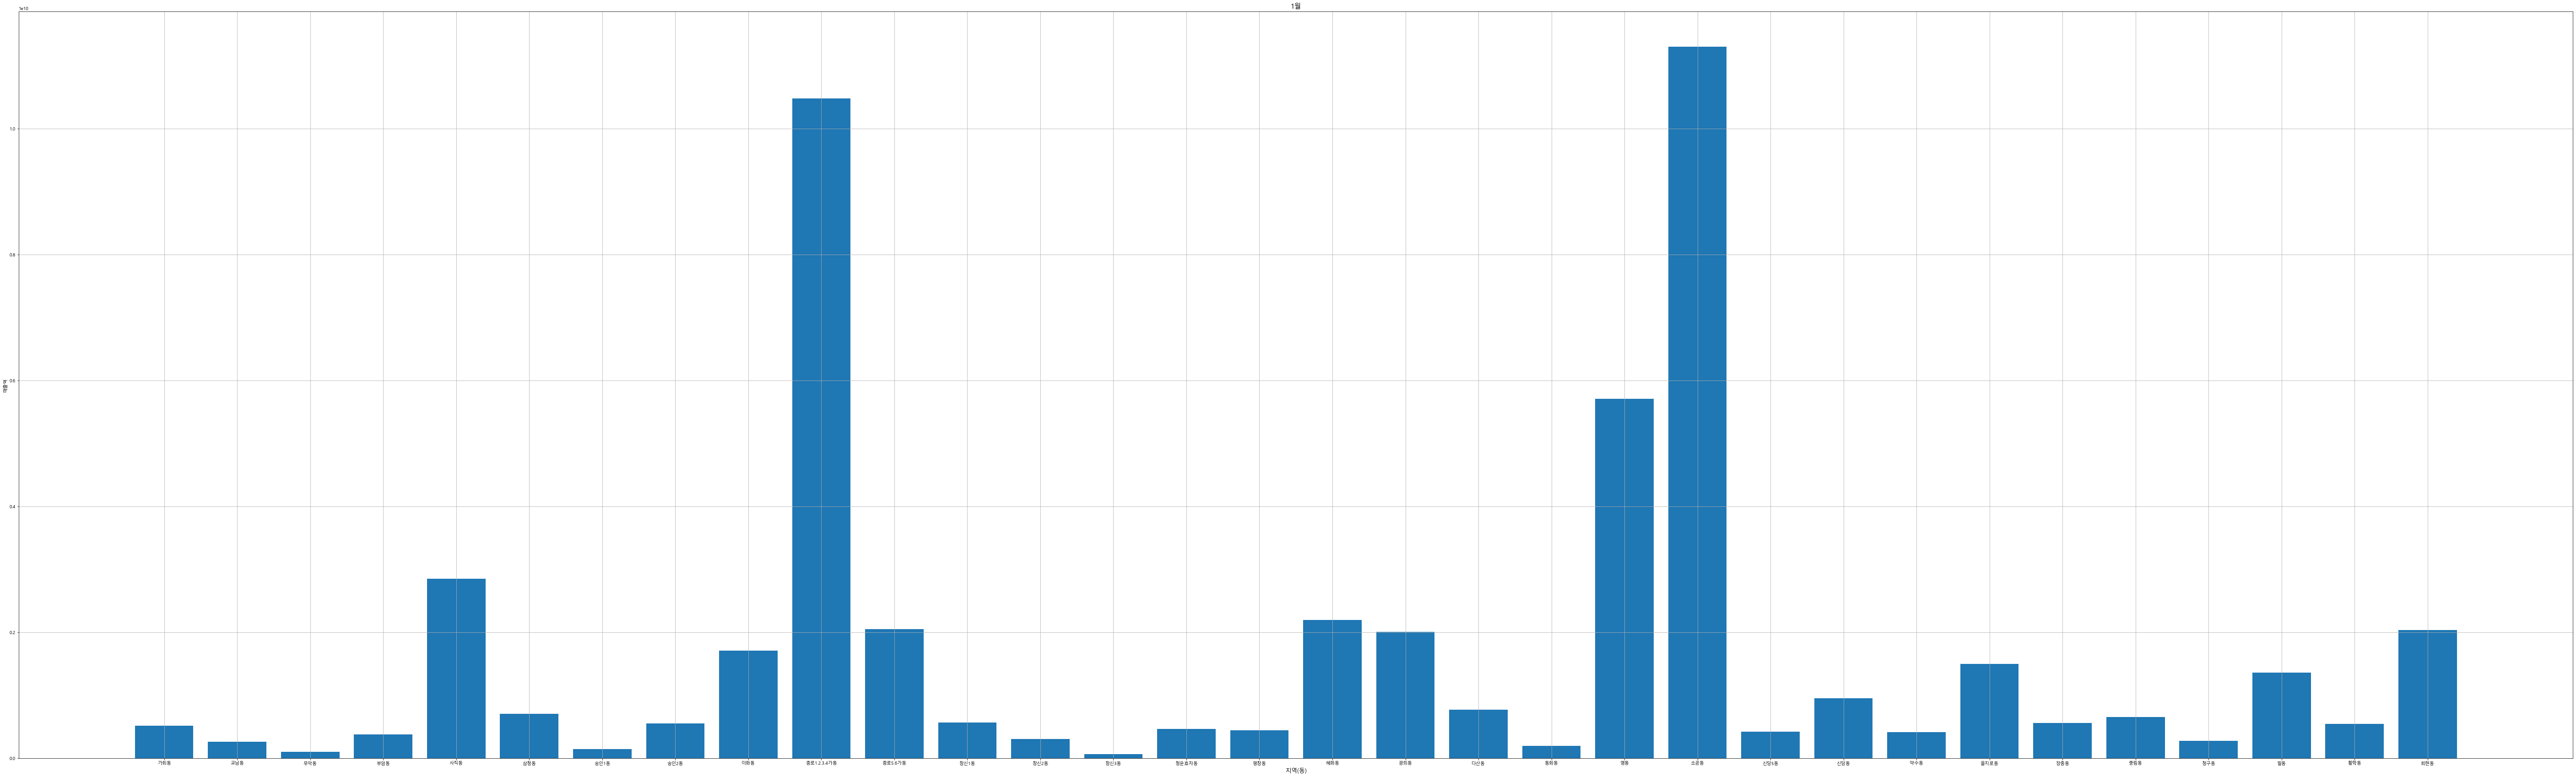

In [13]:
#1월 지역(동)별 매출액(금액) 그래프 구현
comp_jan = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201901]
print(comp_jan.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_jan["지역(동)"],comp_jan["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_jan.jpg')
plt.show()

   지역(구) 지역(동)    매출년월          금액     금액_total
1    종로구   가회동  201902   440537780   3314908263
7    종로구   교남동  201902   226365470   1593641202
13   종로구   무악동  201902    91988251    677782614
19   종로구   부암동  201902   330833760   2929990336
25   종로구   사직동  201902  2325344026  16319579769


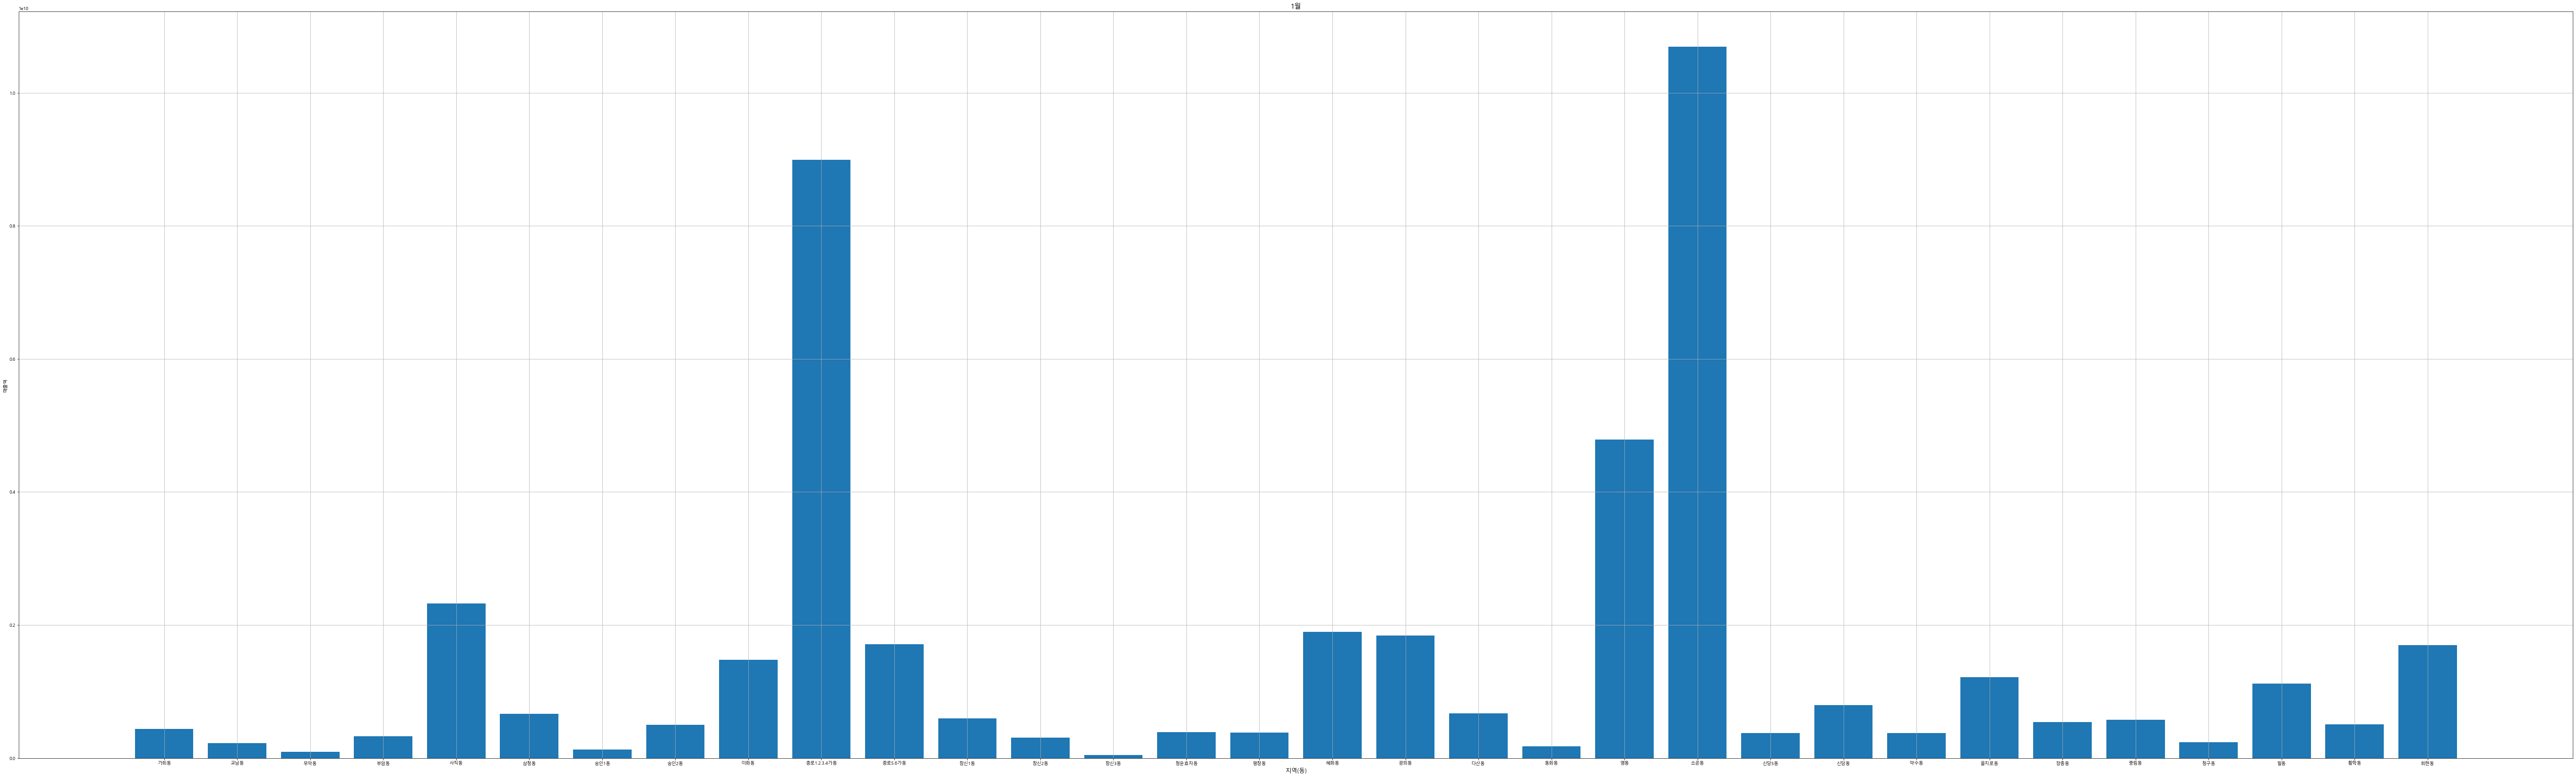

In [14]:
#2월 지역(동)별 매출액(금액) 그래프 구현
comp_feb = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201902]
print(comp_feb.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_feb["지역(동)"],comp_feb["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_feb.jpg')
plt.show()

   지역(구) 지역(동)    매출년월          금액     금액_total
2    종로구   가회동  201903   591058068   3314908263
8    종로구   교남동  201903   280419356   1593641202
14   종로구   무악동  201903   121708990    677782614
20   종로구   부암동  201903   551443500   2929990336
26   종로구   사직동  201903  2769227558  16319579769


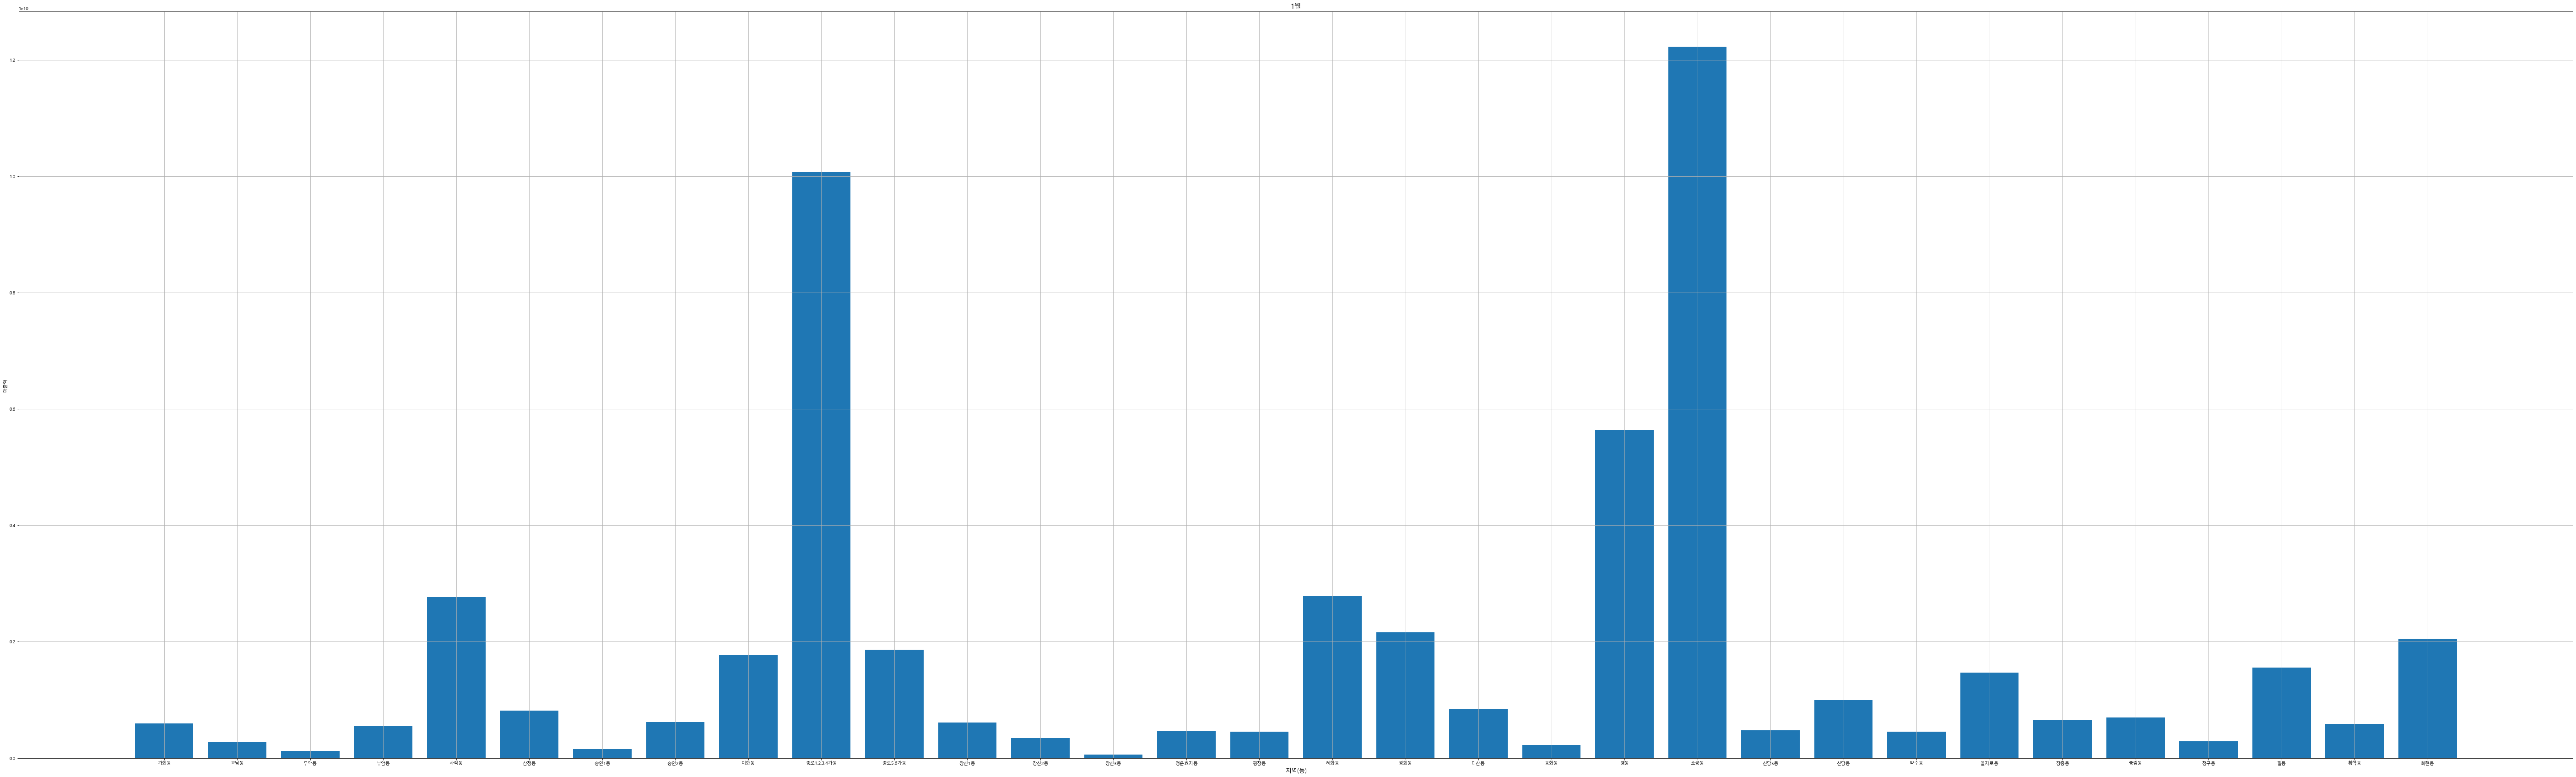

In [15]:
#3월 지역(동)별 매출액(금액) 그래프 구현
comp_mar = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201903]
print(comp_mar.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_mar["지역(동)"],comp_mar["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_mar.jpg')
plt.show()

   지역(구) 지역(동)    매출년월          금액     금액_total
3    종로구   가회동  201904   605247480   3314908263
9    종로구   교남동  201904   271771160   1593641202
15   종로구   무악동  201904   115400993    677782614
21   종로구   부암동  201904   577607979   2929990336
27   종로구   사직동  201904  2747585689  16319579769


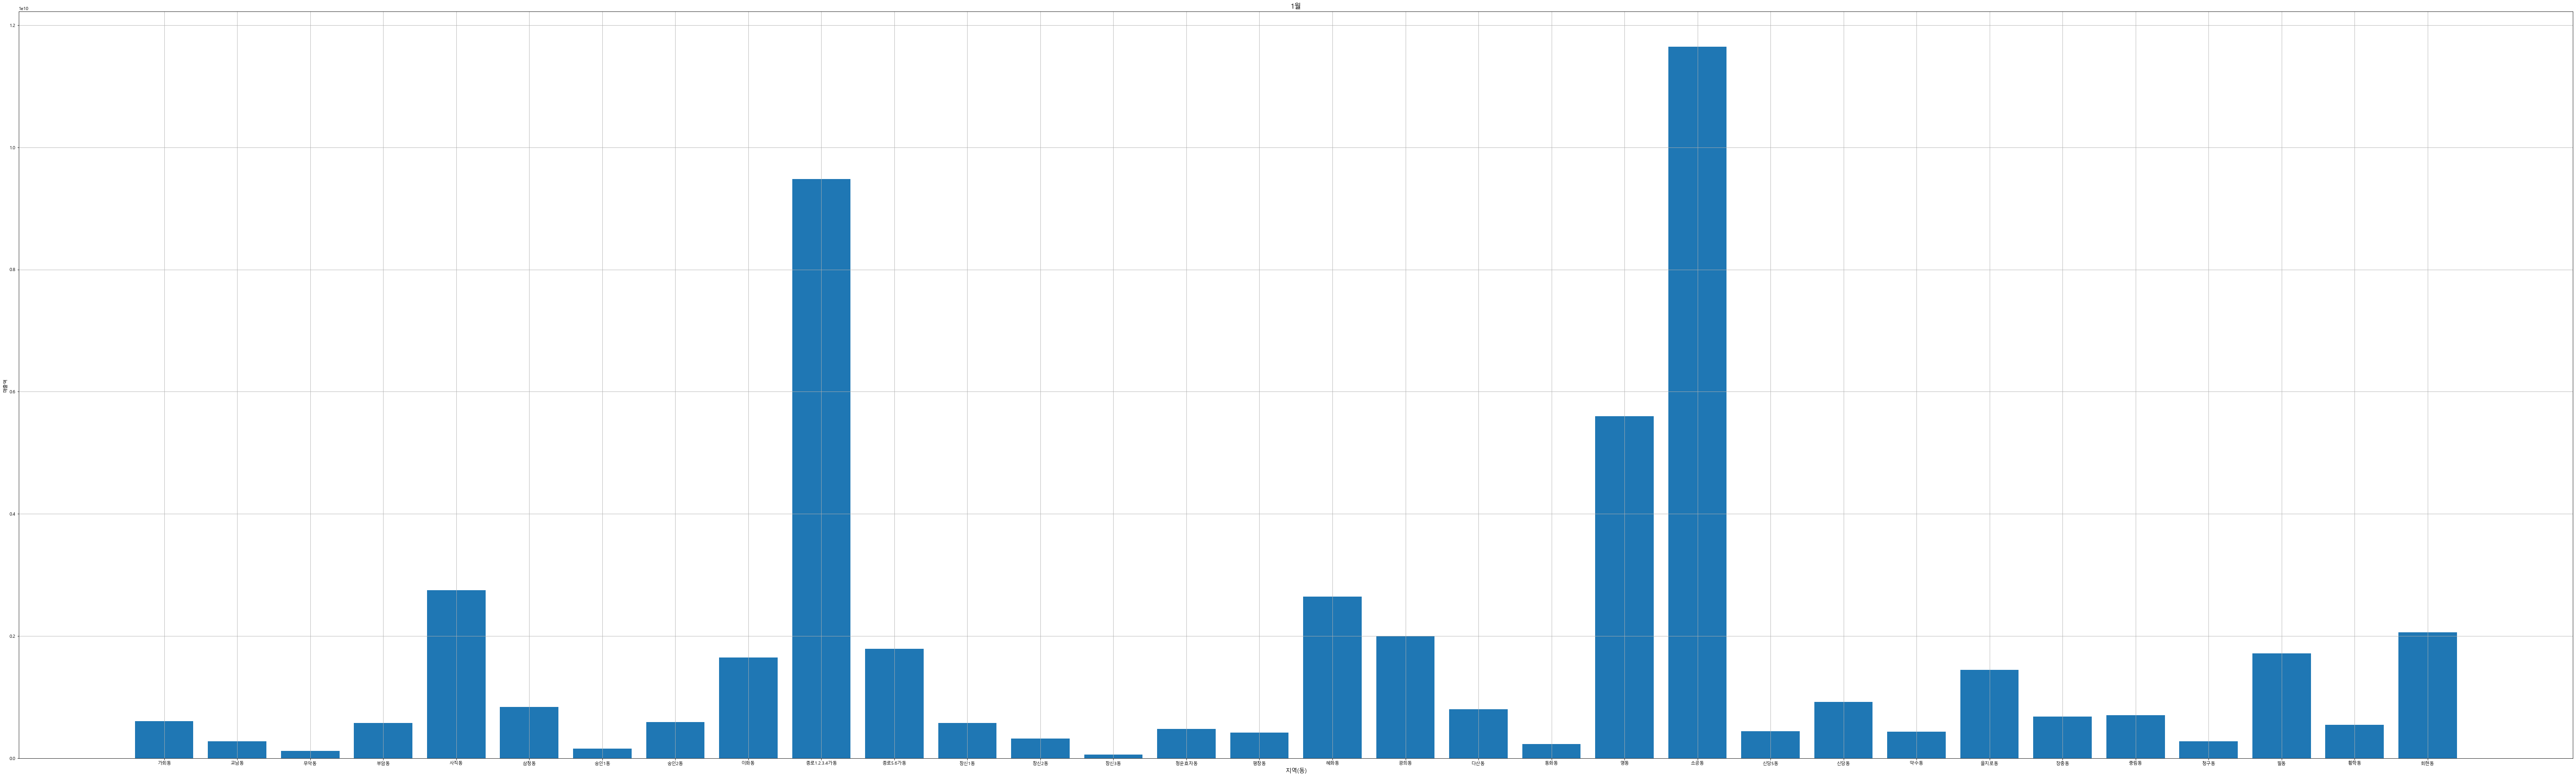

In [16]:
#4월 지역(동)별 매출액(금액) 그래프 구현
comp_apr = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201904]
print(comp_apr.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_apr["지역(동)"],comp_apr["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_apr.jpg')
plt.show()

   지역(구) 지역(동)    매출년월          금액     금액_total
4    종로구   가회동  201905   607625122   3314908263
10   종로구   교남동  201905   291036610   1593641202
16   종로구   무악동  201905   127638217    677782614
22   종로구   부암동  201905   600207780   2929990336
28   종로구   사직동  201905  2915286916  16319579769


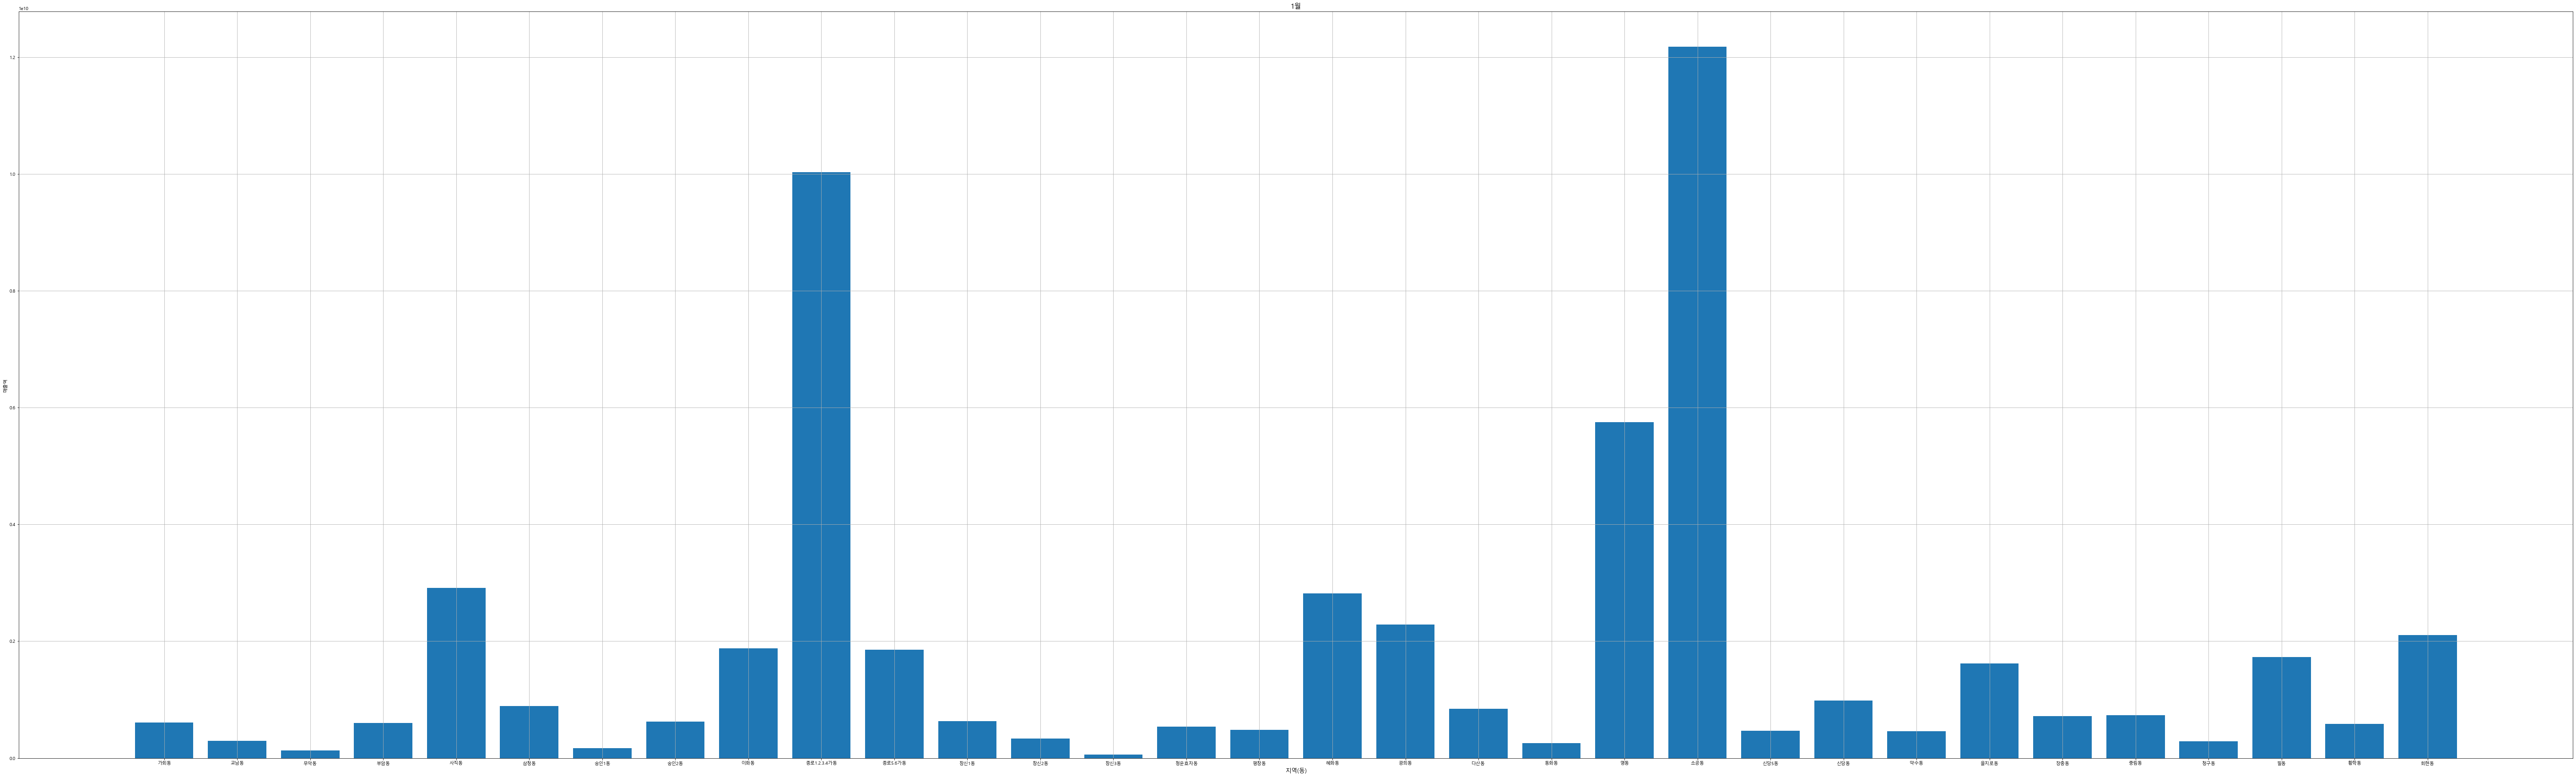

In [17]:
#5월 지역(동)별 매출액(금액) 그래프 구현
comp_may = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201905]
print(comp_may.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_may["지역(동)"],comp_may["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_may.jpg')
plt.show()

   지역(구) 지역(동)    매출년월          금액     금액_total
5    종로구   가회동  201906   555757842   3314908263
11   종로구   교남동  201906   267152070   1593641202
17   종로구   무악동  201906   121701510    677782614
23   종로구   부암동  201906   493374026   2929990336
29   종로구   사직동  201906  2713015110  16319579769


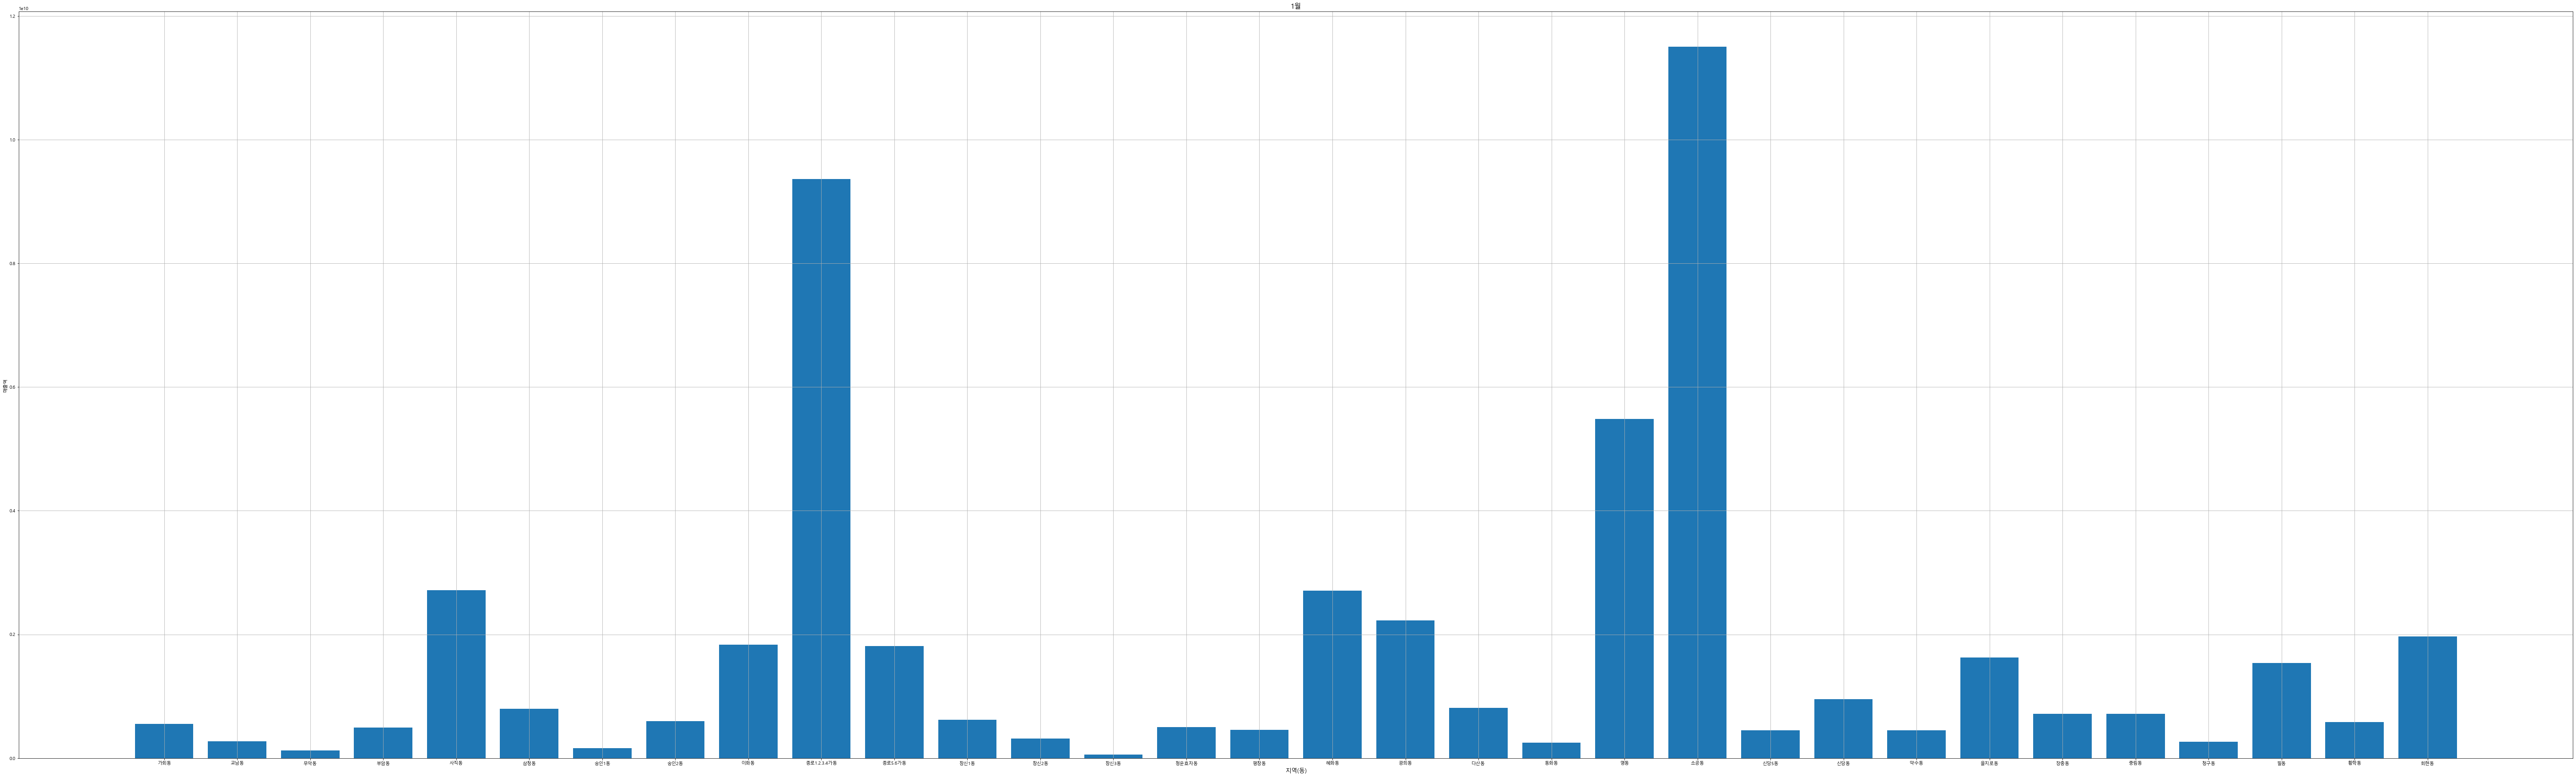

In [18]:
#6월 지역(동)별 매출액(금액) 그래프 구현
comp_jun = bccard_매출년월_금액.loc[bccard_매출년월_금액["매출년월"]==201906]
print(comp_jun.head(5))
plt.figure(figsize=(100,30))
plt.bar(comp_jun["지역(동)"],comp_jun["금액"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("1월", fontsize=15)
plt.savefig('./그래프/comp_jun.jpg')
plt.show()

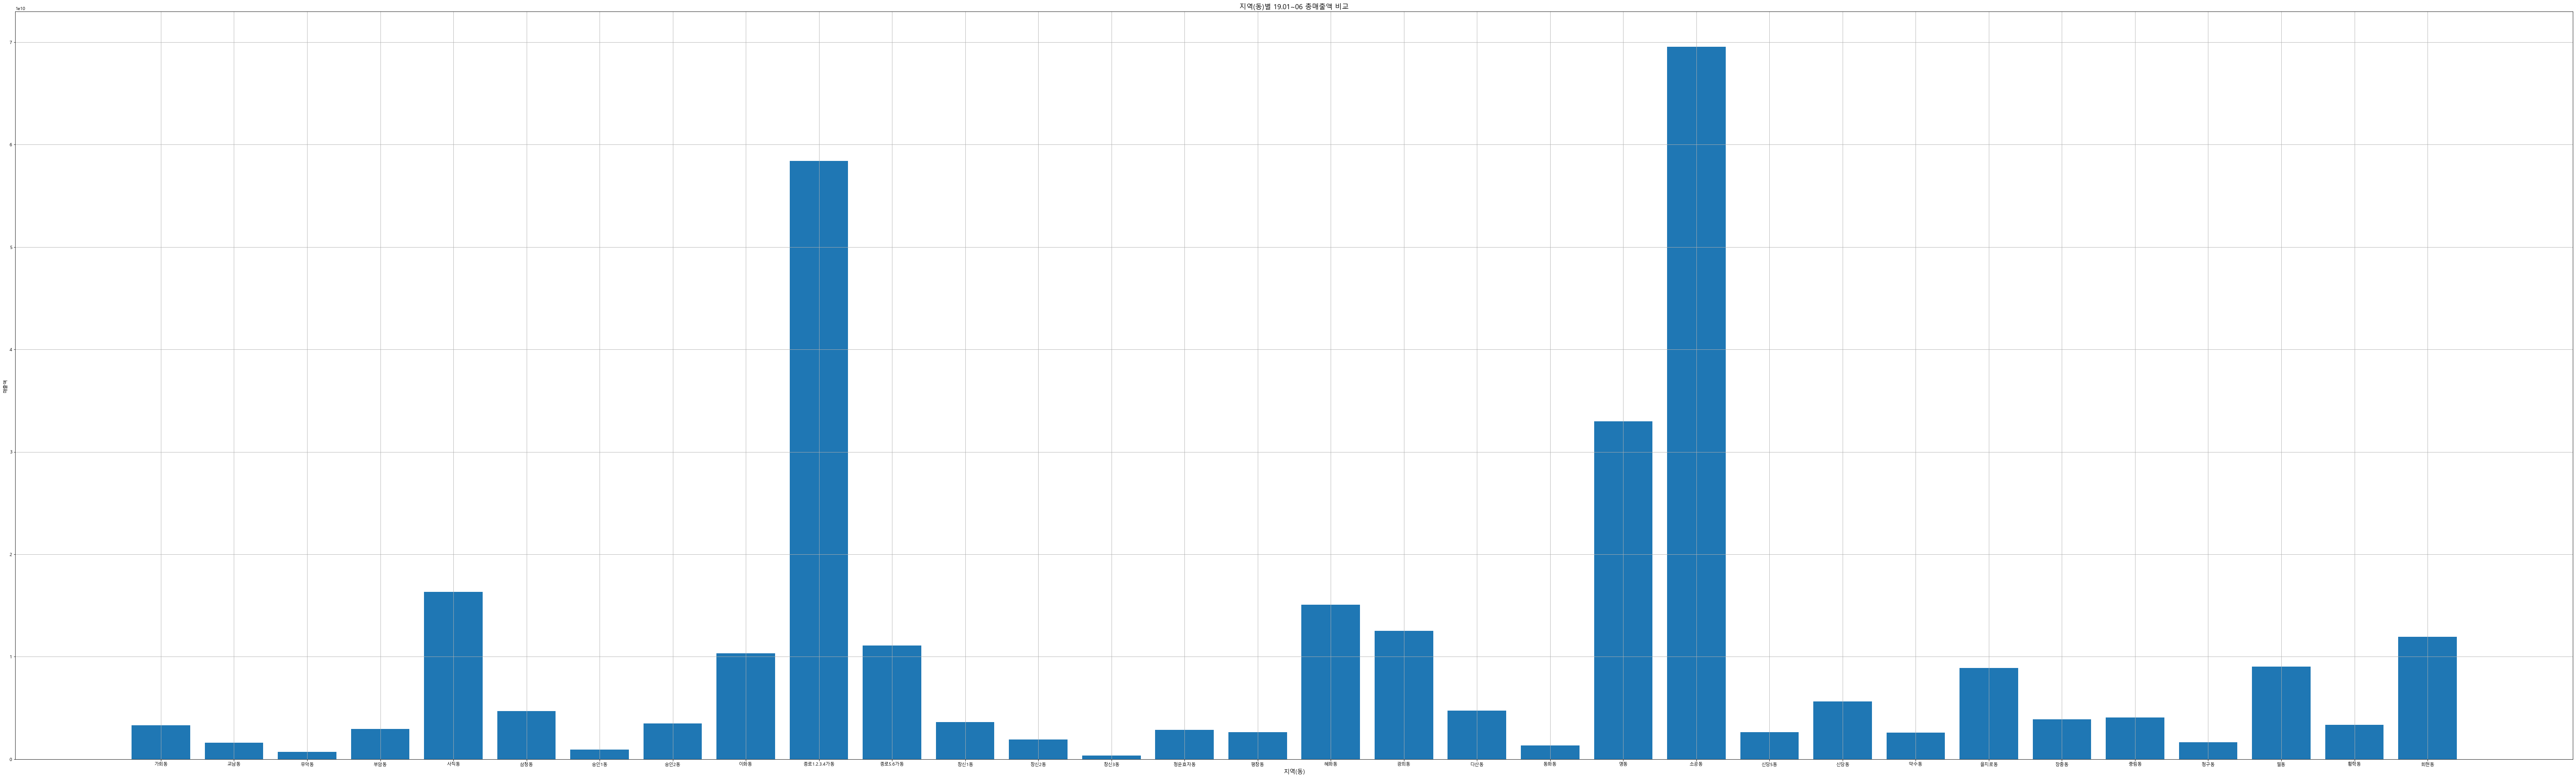

In [19]:
#지역(동)별 19.01~06 총매출액 비교 그래프 구현
plt.figure(figsize=(100,30))
plt.bar(bccard_매출년월_금액["지역(동)"],bccard_매출년월_금액["금액_total"])
plt.ylabel("매출액")
plt.xlabel("지역(동)", fontsize=13)
plt.title("지역(동)별 19.01~06 총매출액 비교", fontsize=15)
plt.savefig('./그래프/매출년월_금액_total.jpg')
plt.show()

In [20]:
# 지역(동)별 업종명에 따른 매출액
# 시리즈 형식을 csv파일로 바꿔서 저장하고 데이터프레임 형식으로 변환하기
def save_by_place(df, idx=0):
    data = df.groupby([df['지역(구)'],df['지역(동)'],df['업종명']]).sum()
    data.to_csv("C:\\Users\\user\\금융빅데이터공모전\\bccard_name_amount.csv")
    
save_by_place(bccard_2)

In [21]:
bccard_업종명_금액 = pd.read_csv("C:\\Users\\user\\금융빅데이터공모전\\bccard_name_amount.csv")
bccard_업종명_금액

,지역(구),지역(동),업종명,금액
0,종로구,가회동,서양음식,1145177050
1,종로구,가회동,스넥,135071990
2,종로구,가회동,일반한식,1673397273
3,종로구,가회동,편 의 점,361261950
4,종로구,교남동,서양음식,336890140
...,...,...,...,...
123,중구,황학동,편 의 점,623445930
124,중구,회현동,서양음식,3078214925
125,중구,회현동,스넥,600505666
126,중구,회현동,일반한식,6283604435


In [22]:
temp_2 = bccard_업종명_금액.groupby(["지역(동)"])["금액"].sum()
placelist = bccard_업종명_금액["지역(동)"].drop_duplicates().values
bccard_업종명_금액["금액_total"]=0

for i in placelist:
    test = bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]==i]
    test["금액_total"]=temp_2[i]
    bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]==i] = test

bccard_업종명_금액

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,지역(구),지역(동),업종명,금액,금액_total
0,종로구,가회동,서양음식,1145177050,3314908263
1,종로구,가회동,스넥,135071990,3314908263
2,종로구,가회동,일반한식,1673397273,3314908263
3,종로구,가회동,편 의 점,361261950,3314908263
4,종로구,교남동,서양음식,336890140,1593641202
...,...,...,...,...,...
123,중구,황학동,편 의 점,623445930,3345251434
124,중구,회현동,서양음식,3078214925,11914154116
125,중구,회현동,스넥,600505666,11914154116
126,중구,회현동,일반한식,6283604435,11914154116


   지역(구) 지역(동)    업종명           금액     금액_total
84    중구   소공동   서양음식  58665068848  69539391104
85    중구   소공동     스넥    862449993  69539391104
86    중구   소공동   일반한식   7946431973  69539391104
87    중구   소공동  편 의 점   2065440290  69539391104


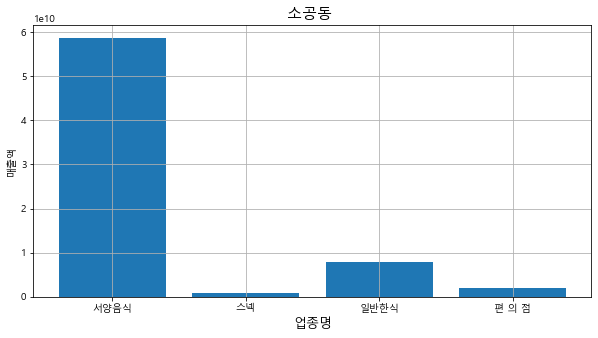

In [23]:
#소공동 업종명별 매출액(금액) 그래프 구현 (월별 매출액 1~3위만 비교)
comp_ga = bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]=="소공동"]
print(comp_ga)
plt.figure(figsize=(10,5))
plt.bar(comp_ga["업종명"],comp_ga["금액"])
plt.ylabel("매출액")
plt.xlabel("업종명", fontsize=13)
plt.title("소공동 ", fontsize=15)
plt.savefig('./그래프/comp_ga.jpg')
plt.show()

   지역(구)        지역(동)    업종명           금액     금액_total
36   종로구  종로1.2.3.4가동   서양음식  15625761552  58417037576
37   종로구  종로1.2.3.4가동     스넥   2243950453  58417037576
38   종로구  종로1.2.3.4가동   일반한식  34819918283  58417037576
39   종로구  종로1.2.3.4가동  편 의 점   5727407288  58417037576


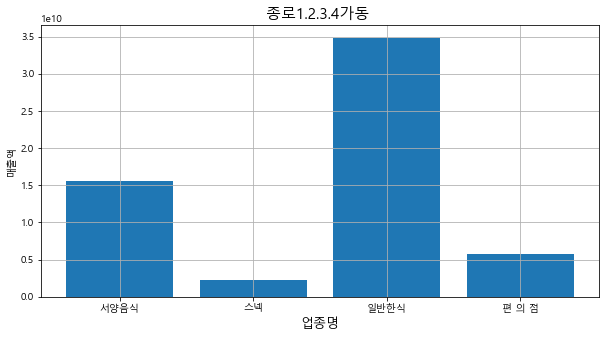

In [24]:
#종로1,2,3,4가동 업종명별 매출액(금액) 그래프 구현 (월별 매출액 1~3위만 비교)
comp_jong = bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]=="종로1.2.3.4가동"]
print(comp_jong)
plt.figure(figsize=(10,5))
plt.bar(comp_jong["업종명"],comp_jong["금액"])
plt.ylabel("매출액")
plt.xlabel("업종명", fontsize=13)
plt.title("종로1.2.3.4가동 ", fontsize=15)
plt.savefig('./그래프/comp_jong.jpg')
plt.show()

   지역(구) 지역(동)    업종명           금액     금액_total
80    중구    명동   서양음식   8929738004  32963768366
81    중구    명동     스넥   1675890563  32963768366
82    중구    명동   일반한식  17704331109  32963768366
83    중구    명동  편 의 점   4653808690  32963768366


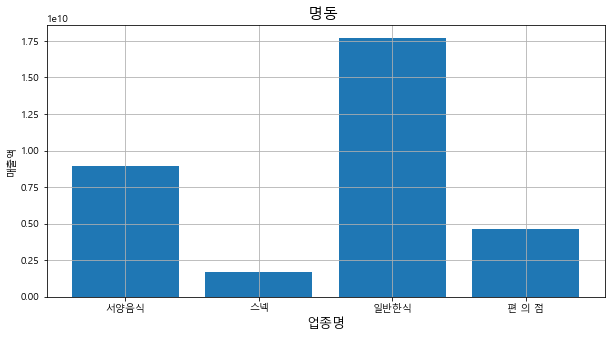

In [25]:
#명동 업종명별 매출액(금액) 그래프 구현 (월별 매출액 1~3위만 비교)
comp_myeong = bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]=="명동"]
print(comp_myeong)
plt.figure(figsize=(10,5))
plt.bar(comp_myeong["업종명"],comp_myeong["금액"])
plt.ylabel("매출액")
plt.xlabel("업종명", fontsize=13)
plt.title("명동 ", fontsize=15)
plt.savefig('./그래프/comp_myeong.jpg')
plt.show()

   지역(구) 지역(동)    업종명          금액    금액_total
92    중구   신당동   서양음식   636664137  5607955235
93    중구   신당동     스넥   403480743  5607955235
94    중구   신당동   일반한식  3126948856  5607955235
95    중구   신당동  편 의 점  1440861499  5607955235


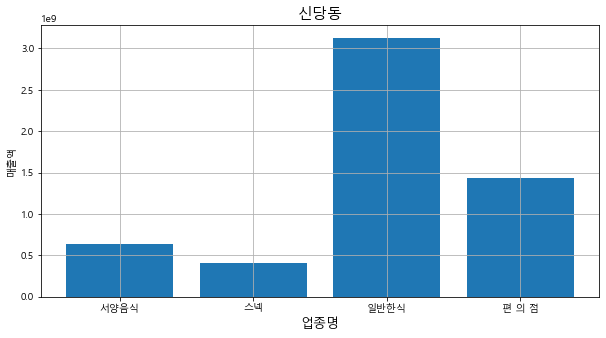

In [26]:
#명동 업종명별 매출액(금액) 신당동 그래프 구현
comp_myeong = bccard_업종명_금액.loc[bccard_업종명_금액["지역(동)"]=="신당동"]
print(comp_myeong)
plt.figure(figsize=(10,5))
plt.bar(comp_myeong["업종명"],comp_myeong["금액"])
plt.ylabel("매출액")
plt.xlabel("업종명", fontsize=13)
plt.title("신당동", fontsize=15)
plt.savefig('./그래프/업종명_신당동.jpg')
plt.show()